In [15]:
# load packages 
library(reshape2)
library(ggplot2)
library(lme4)
library(lmerTest)
library(brms)
library(MASS)
library(poissonMT)
library(repmod)
library(psych)
library(nFactors)
library(lavaan)

In [1]:
# set working directory to dataFiles and read in files
setwd('../dataFiles')
subDate<-read.csv('autobioMem_subDate.csv')
loadings<-read.csv('autobioMem_loadings.csv')
EFA_dat<-read.csv("autobioMem_EFA.csv")
CFA_dat<-read.csv("autobioMem_CFA.csv")
sub<-read.csv('autobioMem_sub.csv')

## exploratory factor analysis loadings

In [8]:
# prepare data for factor table 
loadings$words3<-reorder(loadings$words3,loadings$wordOrder)

loadings_m <- melt(loadings, id="words3", 
                        measure=c('pos_low.arousal_scaled','neg_low.arousal_scaled','pos_high.arousal_scaled','neg_high.arousal_scaled','pos_self','neg_self'), 
                        variable.name="Factor", value.name="Loading")

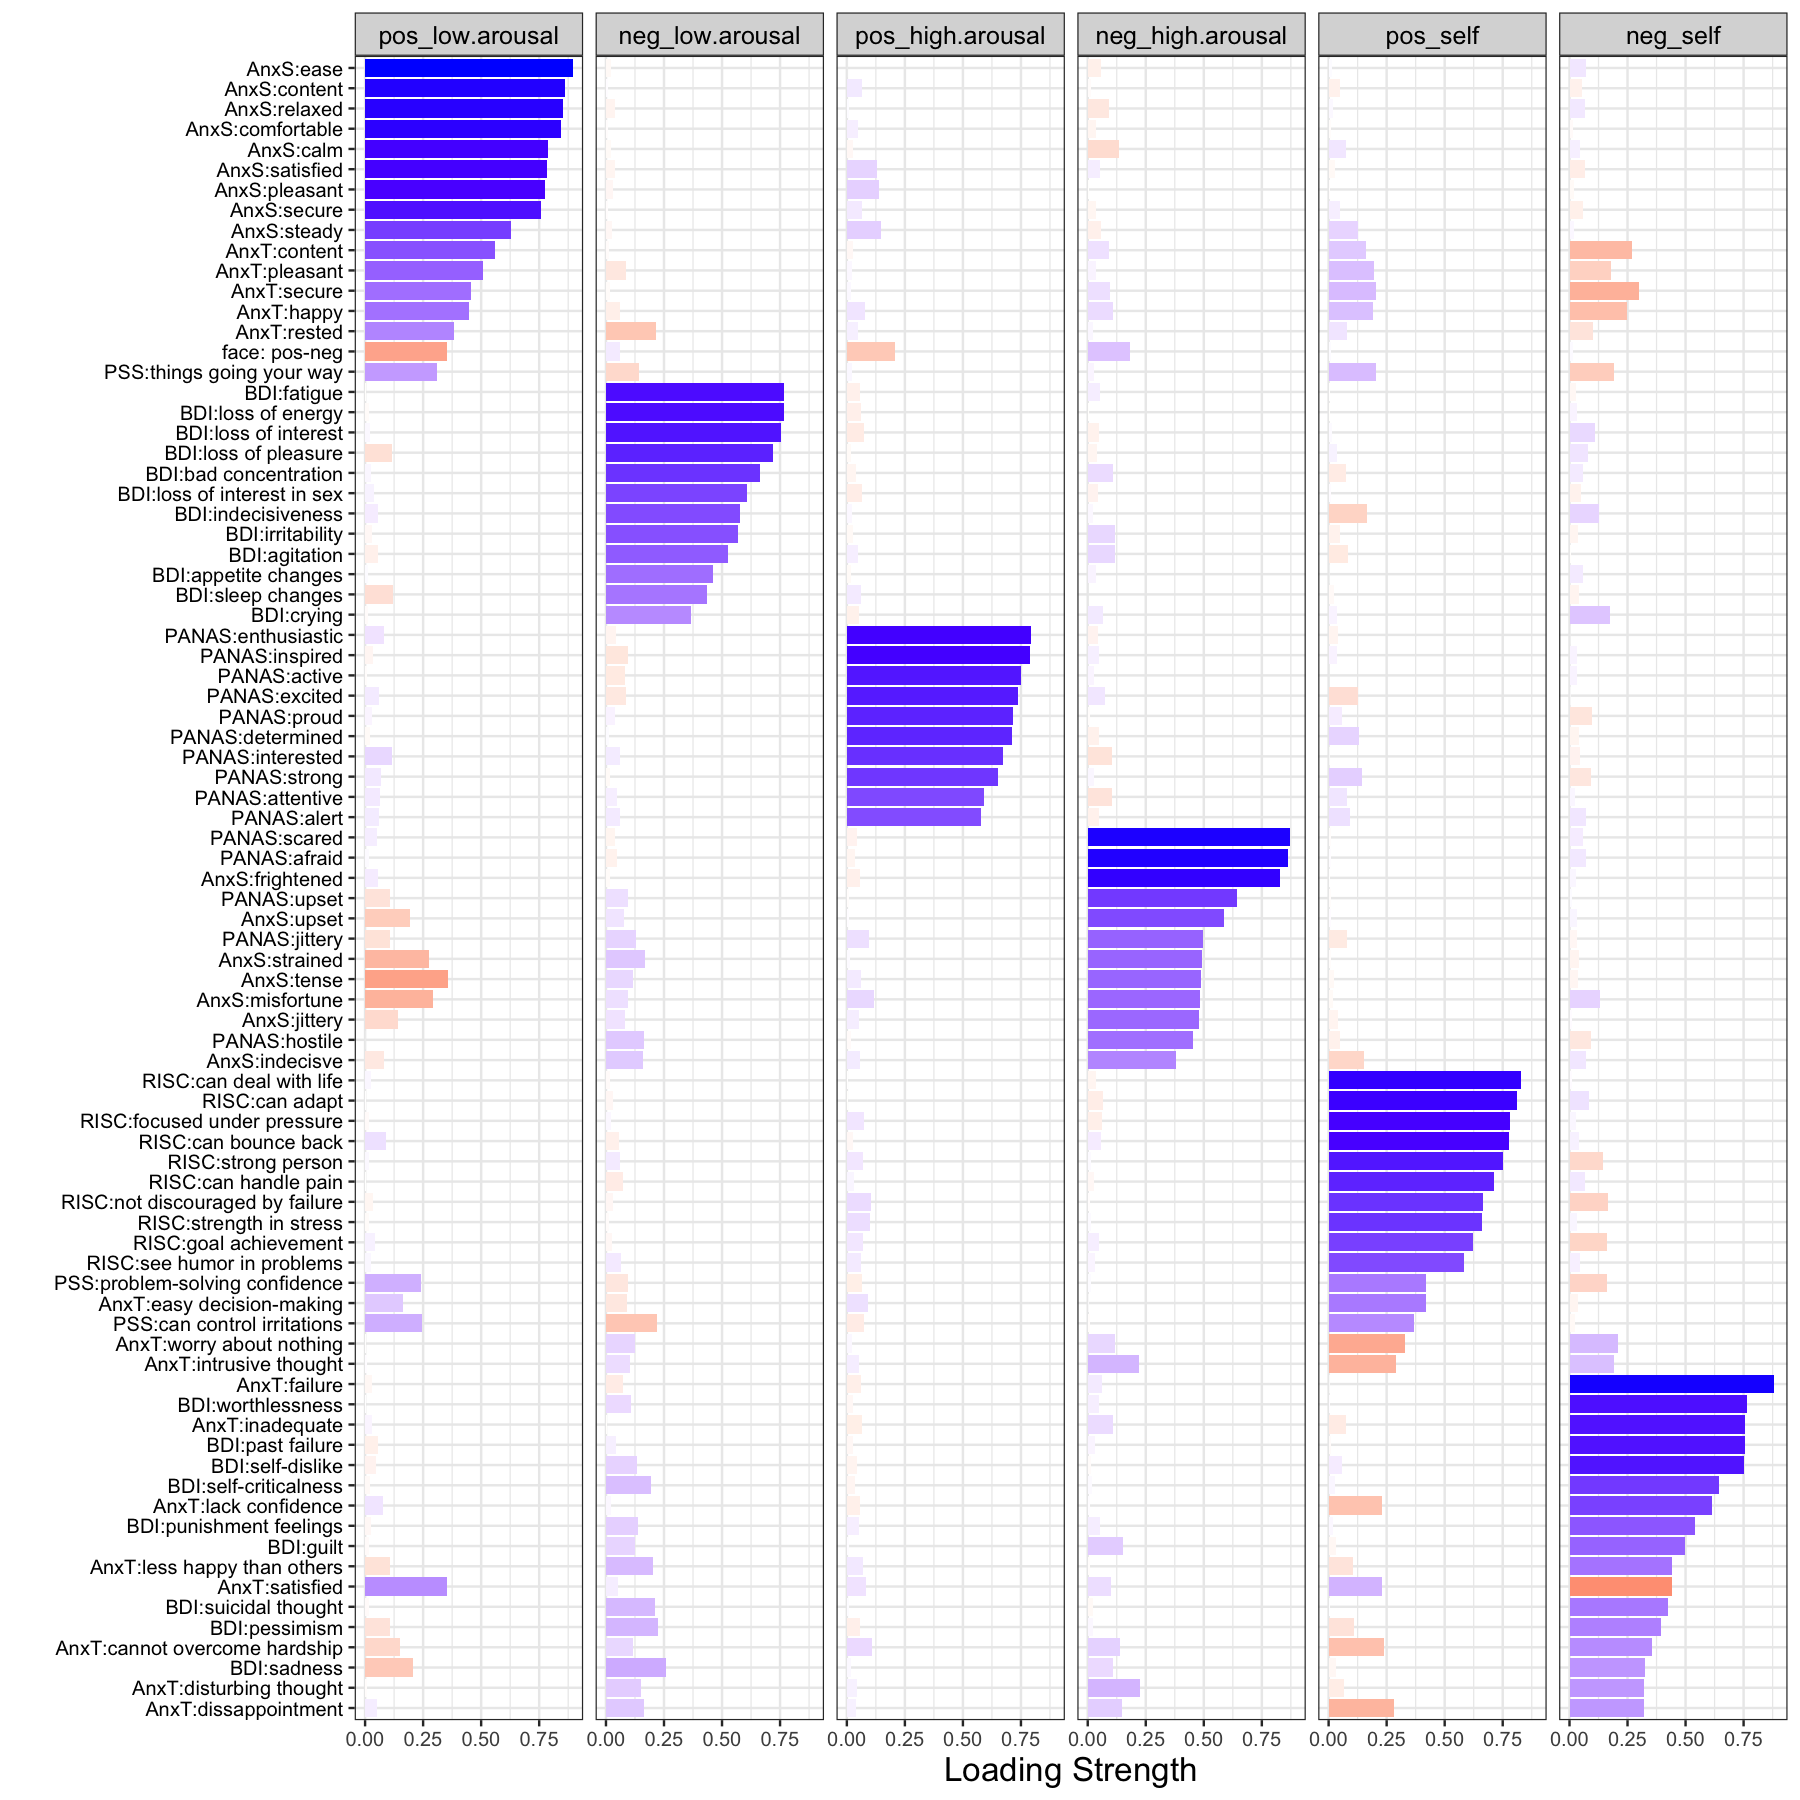

In [9]:
# set image size 
options(repr.plot.width=15,repr.plot.height=15)

ggplot(loadings_m, aes(words3, abs(Loading), fill=Loading)) + 
  facet_wrap(~ Factor, nrow=1) + #place the factors in separate facets
  geom_bar(stat="identity") + #make the bars
  coord_flip() + #flip the axes so the test names can be horizontal  
  #define the fill color gradient: blue=positive, red=negative
  scale_fill_gradient2(name = "Loading", 
                       high = "blue", mid = "white", low = "red", 
                       midpoint=0, guide='none') +
  ylab("Loading Strength") + xlab('') + #improve y-axis label
  theme_bw(base_size=15) + #use a black-and-white theme with set font size
  theme(strip.text.x = element_text(size = 15, colour = "black"),axis.title = element_text(size=20),axis.text.y = element_text(size=12,colour="black"),plot.title = element_text(size = 20, face = "bold"))

## confirmatory factor analysis

In [14]:
# write in factors
path <- '
f1 =~ AnxS1_5+AnxS1_16+AnxS1_15+AnxS1_10+AnxS1_1+AnxS1_8+AnxS1_20+AnxS1_2+AnxS1_19+AnxT_16+AnxT_1+AnxT_13+AnxT_10+AnxT_6+RW27+PSS5+AnxT_3+AnxS1_3+AnxS1_7 
f2 =~ AnxT_13+AnxT_5+BDI14+AnxT_15+BDI3+BDI7+BDI8+AnxT_12+BDI6+BDI5+AnxT_4+AnxT_3+BDI9+BDI2+AnxT_8+BDI1+AnxT_11+AnxT_18
f3 =~ RISC1_2+RISC1_1+RISC1_7+RISC1_5+RISC1_9+RISC1_10+RISC1_8+RISC1_4+RISC1_6+RISC1_3+PSS4+AnxT_14+PSS7+AnxT_9+AnxT_17 
f4 =~ BDI20+BDI15+BDI12+BDI4+BDI19+BDI21+BDI13+BDI17+BDI11+BDI18+BDI16+BDI10
f5 =~ PANA1_9+PANA1_14+PANA1_19+PANA1_3+PANA1_10+PANA1_16+PANA1_1+PANA1_5+PANA1_17+PANA1_12
f6 =~ PANA1_7+PANA1_20+AnxS1_9+PANA1_4+AnxS1_6+PANA1_18+AnxS1_4+AnxS1_3+AnxS1_7+AnxS1_13+PANA1_8+AnxS1_14
'
cfit<-cfa(path,CFA_dat)
summary(cfit, rsquare=TRUE, fit.measures=TRUE)
library(parameters)
model_parameters(cfit)

lavaan 0.6-10 ended normally after 111 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                       183
                                                      
  Number of observations                           932
                                                      
Model Test User Model:
                                                       
  Test statistic                              15016.141
  Degrees of freedom                               3220
  P-value (Chi-square)                            0.000

Model Test Baseline Model:

  Test statistic                             68525.999
  Degrees of freedom                              3321
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.819
  Tucker-Lewis Index (TLI)                       0.813

Loglikelihood and Information C

,To,Operator,From,Coefficient,SE,CI_low,CI_high,z,p,Component
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,f1,=~,AnxS1_5,1.0000000,0.00000000,1.0000000,1.0000000,NA,0.000000e+00,Loading
2,f1,=~,AnxS1_16,1.0307821,0.02525569,0.9812819,1.0802824,40.813862,0.000000e+00,Loading
3,f1,=~,AnxS1_15,0.9977652,0.02483227,0.9490948,1.0464355,40.180190,0.000000e+00,Loading
4,f1,=~,AnxS1_10,0.9587464,0.02370761,0.9122803,1.0052124,40.440442,0.000000e+00,Loading
5,f1,=~,AnxS1_1,0.8939734,0.02440089,0.8461485,0.9417983,36.636917,0.000000e+00,Loading
6,f1,=~,AnxS1_8,0.9592640,0.02524018,0.9097942,1.0087339,38.005431,0.000000e+00,Loading
7,f1,=~,AnxS1_20,0.9798669,0.02517765,0.9305196,1.0292142,38.918121,0.000000e+00,Loading
8,f1,=~,AnxS1_2,0.9504984,0.02497849,0.9015414,0.9994553,38.052669,0.000000e+00,Loading
9,f1,=~,AnxS1_19,0.9040841,0.02698228,0.8511998,0.9569683,33.506586,0.000000e+00,Loading


## six factors predicted the amount and sentiment of recall

In [18]:
summary(glm(memCount_total_2020~scale(posLow),data=sub,family = poisson(link = "log")))
summary(glm(memCount_total_2020~scale(negLow),data=sub,family = poisson(link = "log")))
summary(glm(memCount_total_2020~scale(posHigh),data=sub,family = poisson(link = "log")))
summary(glm(memCount_total_2020~scale(negHigh),data=sub,family = poisson(link = "log")))
summary(glm(memCount_total_2020~scale(posSelf),data=sub,family = poisson(link = "log")))
summary(glm(memCount_total_2020~scale(negSelf),data=sub,family = poisson(link = "log")))


Call:
glm(formula = memCount_total_2020 ~ scale(posLow), family = poisson(link = "log"), 
    data = sub)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-4.592  -2.768  -1.397   0.860  33.063  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    2.727081   0.008633 315.892  < 2e-16 ***
scale(posLow) -0.055442   0.008604  -6.444 1.16e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10462  on 878  degrees of freedom
Residual deviance: 10420  on 877  degrees of freedom
  (60 observations deleted due to missingness)
AIC: 14128

Number of Fisher Scoring iterations: 5



Call:
glm(formula = memCount_total_2020 ~ scale(negLow), family = poisson(link = "log"), 
    data = sub)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-5.167  -2.760  -1.385   0.913  32.142  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.723147   0.008665  314.26   <2e-16 ***
scale(negLow) 0.102888   0.008196   12.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10462  on 878  degrees of freedom
Residual deviance: 10309  on 877  degrees of freedom
  (60 observations deleted due to missingness)
AIC: 14017

Number of Fisher Scoring iterations: 5



Call:
glm(formula = memCount_total_2020 ~ scale(posHigh), family = poisson(link = "log"), 
    data = sub)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-4.605  -2.717  -1.365   0.916  33.530  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     2.726633   0.008637 315.692  < 2e-16 ***
scale(posHigh) -0.063391   0.008766  -7.231 4.78e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10462  on 878  degrees of freedom
Residual deviance: 10409  on 877  degrees of freedom
  (60 observations deleted due to missingness)
AIC: 14117

Number of Fisher Scoring iterations: 5



Call:
glm(formula = memCount_total_2020 ~ scale(negHigh), family = poisson(link = "log"), 
    data = sub)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-4.482  -2.751  -1.408   0.921  33.561  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    2.728278   0.008623 316.409  < 2e-16 ***
scale(negHigh) 0.025951   0.008457   3.069  0.00215 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10462  on 878  degrees of freedom
Residual deviance: 10452  on 877  degrees of freedom
  (60 observations deleted due to missingness)
AIC: 14160

Number of Fisher Scoring iterations: 5



Call:
glm(formula = memCount_total_2020 ~ scale(posSelf), family = poisson(link = "log"), 
    data = sub)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-4.666  -2.761  -1.388   0.893  33.137  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     2.72747    0.00863 316.062  < 2e-16 ***
scale(posSelf) -0.04779    0.00855  -5.589 2.28e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10462  on 878  degrees of freedom
Residual deviance: 10430  on 877  degrees of freedom
  (60 observations deleted due to missingness)
AIC: 14139

Number of Fisher Scoring iterations: 5



Call:
glm(formula = memCount_total_2020 ~ scale(negSelf), family = poisson(link = "log"), 
    data = sub)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-4.868  -2.770  -1.417   0.889  32.612  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    2.725595   0.008645  315.28   <2e-16 ***
scale(negSelf) 0.076823   0.008305    9.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10462  on 878  degrees of freedom
Residual deviance: 10378  on 877  degrees of freedom
  (60 observations deleted due to missingness)
AIC: 14086

Number of Fisher Scoring iterations: 5


In [19]:
summary(brm(memCount_total_2020~1+scale(posLow),data = sub, family=poisson, init = "random", cores=10))
summary(brm(memCount_total_2020~1+scale(negLow),data = sub, family=poisson, init = "random", cores=10))
summary(brm(memCount_total_2020~1+scale(posHigh),data = sub, family=poisson, init = "random", cores=10))
summary(brm(memCount_total_2020~1+scale(negHigh),data = sub, family=poisson, init = "random", cores=10))
summary(brm(memCount_total_2020~1+scale(posSelf),data = sub, family=poisson, init = "random", cores=10))
summary(brm(memCount_total_2020~1+scale(negSelf),data = sub, family=poisson, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: memCount_total_2020 ~ 1 + scale(posLow) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept       2.73      0.01     2.71     2.74 1.00     3916     2937
scaleposLow    -0.06      0.01    -0.07    -0.04 1.00     3448     2912

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: memCount_total_2020 ~ 1 + scale(negLow) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept       2.72      0.01     2.71     2.74 1.00     3275     2635
scalenegLow     0.10      0.01     0.09     0.12 1.00     3204     2332

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: memCount_total_2020 ~ 1 + scale(posHigh) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        2.73      0.01     2.71     2.74 1.00     3196     2695
scaleposHigh    -0.06      0.01    -0.08    -0.05 1.00     3416     2640

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: memCount_total_2020 ~ 1 + scale(negHigh) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        2.73      0.01     2.71     2.74 1.00     3678     2921
scalenegHigh     0.03      0.01     0.01     0.04 1.00     3637     2750

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: memCount_total_2020 ~ 1 + scale(posSelf) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        2.73      0.01     2.71     2.74 1.00     3081     2336
scaleposSelf    -0.05      0.01    -0.06    -0.03 1.00     2771     2518

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: memCount_total_2020 ~ 1 + scale(negSelf) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        2.73      0.01     2.71     2.74 1.00     3675     2675
scalenegSelf     0.08      0.01     0.06     0.09 1.00     3708     2750

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [20]:
summary(lm(compound_avg_2020~scale(posLow),data=sub))
summary(lm(compound_avg_2020~scale(negLow),data=sub))
summary(lm(compound_avg_2020~scale(posHigh),data=sub))
summary(lm(compound_avg_2020~scale(negHigh),data=sub))
summary(lm(compound_avg_2020~scale(posSelf),data=sub))
summary(lm(compound_avg_2020~scale(negSelf),data=sub))


Call:
lm(formula = compound_avg_2020 ~ scale(posLow), data = sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77952 -0.11805 -0.00763  0.10748  0.85813 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.020870   0.006543   3.190  0.00147 ** 
scale(posLow) 0.028071   0.006546   4.288    2e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.194 on 877 degrees of freedom
  (60 observations deleted due to missingness)
Multiple R-squared:  0.02054,	Adjusted R-squared:  0.01942 
F-statistic: 18.39 on 1 and 877 DF,  p-value: 2.002e-05



Call:
lm(formula = compound_avg_2020 ~ scale(negLow), data = sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77385 -0.11654 -0.00459  0.10245  0.92941 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.020870   0.006551   3.186   0.0015 ** 
scale(negLow) -0.026190   0.006555  -3.995    7e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1942 on 877 degrees of freedom
  (60 observations deleted due to missingness)
Multiple R-squared:  0.01788,	Adjusted R-squared:  0.01676 
F-statistic: 15.96 on 1 and 877 DF,  p-value: 7.002e-05



Call:
lm(formula = compound_avg_2020 ~ scale(posHigh), data = sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76887 -0.11925 -0.00427  0.11032  0.84975 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.020870   0.006580   3.172  0.00157 **
scale(posHigh) 0.018898   0.006584   2.870  0.00420 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1951 on 877 degrees of freedom
  (60 observations deleted due to missingness)
Multiple R-squared:  0.009307,	Adjusted R-squared:  0.008177 
F-statistic: 8.239 on 1 and 877 DF,  p-value: 0.004199



Call:
lm(formula = compound_avg_2020 ~ scale(negHigh), data = sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76563 -0.11552 -0.00604  0.10758  0.89368 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)     0.020870   0.006595   3.165  0.00161 **
scale(negHigh) -0.013551   0.006599  -2.054  0.04032 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1955 on 877 degrees of freedom
  (60 observations deleted due to missingness)
Multiple R-squared:  0.004785,	Adjusted R-squared:  0.003651 
F-statistic: 4.217 on 1 and 877 DF,  p-value: 0.04032



Call:
lm(formula = compound_avg_2020 ~ scale(posSelf), data = sub)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7722 -0.1190 -0.0081  0.1070  0.8703 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.020870   0.006577   3.173  0.00156 **
scale(posSelf) 0.019796   0.006581   3.008  0.00270 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.195 on 877 degrees of freedom
  (60 observations deleted due to missingness)
Multiple R-squared:  0.01021,	Adjusted R-squared:  0.009084 
F-statistic: 9.049 on 1 and 877 DF,  p-value: 0.002703



Call:
lm(formula = compound_avg_2020 ~ scale(negSelf), data = sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77937 -0.11832 -0.00585  0.10439  0.90065 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.020870   0.006555   3.184 0.001505 ** 
scale(negSelf) -0.025334   0.006559  -3.862 0.000121 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1944 on 877 degrees of freedom
  (60 observations deleted due to missingness)
Multiple R-squared:  0.01673,	Adjusted R-squared:  0.01561 
F-statistic: 14.92 on 1 and 877 DF,  p-value: 0.0001205


In [21]:
summary(brm(compound_avg_2020~1+scale(posLow),data = sub, init = "random", cores=10))
summary(brm(compound_avg_2020~1+scale(negLow),data = sub, init = "random", cores=10))
summary(brm(compound_avg_2020~1+scale(posHigh),data = sub, init = "random", cores=10))
summary(brm(compound_avg_2020~1+scale(negHigh),data = sub, init = "random", cores=10))
summary(brm(compound_avg_2020~1+scale(posSelf),data = sub, init = "random", cores=10))
summary(brm(compound_avg_2020~1+scale(negSelf),data = sub, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: compound_avg_2020 ~ 1 + scale(posLow) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept       0.02      0.01     0.01     0.03 1.00     4206     2913
scaleposLow     0.03      0.01     0.02     0.04 1.00     4341     3111

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.19      0.00     0.19     0.20 1.00     3652     3024

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: compound_avg_2020 ~ 1 + scale(negLow) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept       0.02      0.01     0.01     0.03 1.00     4309     2788
scalenegLow    -0.03      0.01    -0.04    -0.01 1.00     4005     2779

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.19      0.00     0.19     0.20 1.00     2998     2809

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: compound_avg_2020 ~ 1 + scale(posHigh) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        0.02      0.01     0.01     0.03 1.00     3948     2839
scaleposHigh     0.02      0.01     0.01     0.03 1.00     4447     2993

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.20      0.00     0.19     0.20 1.00     3489     2904

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: compound_avg_2020 ~ 1 + scale(negHigh) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        0.02      0.01     0.01     0.03 1.00     4548     3060
scalenegHigh    -0.01      0.01    -0.03    -0.00 1.00     5065     3114

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.20      0.00     0.19     0.21 1.00     3800     2900

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: compound_avg_2020 ~ 1 + scale(posSelf) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        0.02      0.01     0.01     0.03 1.00     4002     2941
scaleposSelf     0.02      0.01     0.01     0.03 1.00     4412     2823

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.20      0.00     0.19     0.21 1.00     3381     2884

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: compound_avg_2020 ~ 1 + scale(negSelf) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        0.02      0.01     0.01     0.03 1.00     4395     2506
scalenegSelf    -0.03      0.01    -0.04    -0.01 1.00     3714     2879

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.19      0.00     0.19     0.20 1.00     3115     2943

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [23]:
summary(mod1<-rlm(intDetails_total_2020~scale(posLow),data=sub))
summary(mod2<-rlm(intDetails_total_2020~scale(negLow),data=sub))
summary(mod3<-rlm(intDetails_total_2020~scale(posHigh),data=sub))
summary(mod4<-rlm(intDetails_total_2020~scale(negHigh),data=sub))
summary(mod5<-rlm(intDetails_total_2020~scale(posSelf),data=sub))
summary(mod6<-rlm(intDetails_total_2020~scale(negSelf),data=sub))
rob.pvals(mod1)
rob.pvals(mod2)
rob.pvals(mod3)
rob.pvals(mod4)
rob.pvals(mod5)
rob.pvals(mod6)


Call: rlm(formula = intDetails_total_2020 ~ scale(posLow), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-106.47  -63.74  -20.17   60.40 4184.87 

Coefficients:
              Value   Std. Error t value
(Intercept)   98.9022  2.9614    33.3970
scale(posLow) -3.4053  2.9631    -1.1493

Residual standard error: 93.42 on 877 degrees of freedom
  (60 observations deleted due to missingness)


Call: rlm(formula = intDetails_total_2020 ~ scale(negLow), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-117.10  -62.85  -17.84   60.38 4178.60 

Coefficients:
              Value   Std. Error t value
(Intercept)   98.8691  2.9662    33.3323
scale(negLow)  5.8452  2.9679     1.9695

Residual standard error: 92.66 on 877 degrees of freedom
  (60 observations deleted due to missingness)


Call: rlm(formula = intDetails_total_2020 ~ scale(posHigh), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-110.46  -62.53  -19.55   60.13 4188.50 

Coefficients:
               Value   Std. Error t value
(Intercept)    98.4862  2.9389    33.5108
scale(posHigh) -6.4436  2.9406    -2.1912

Residual standard error: 91.67 on 877 degrees of freedom
  (60 observations deleted due to missingness)


Call: rlm(formula = intDetails_total_2020 ~ scale(negHigh), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-109.91  -64.72  -19.99   59.62 4188.30 

Coefficients:
               Value   Std. Error t value
(Intercept)    99.1439  2.9648    33.4404
scale(negHigh)  4.0529  2.9665     1.3662

Residual standard error: 94.39 on 877 degrees of freedom
  (60 observations deleted due to missingness)


Call: rlm(formula = intDetails_total_2020 ~ scale(posSelf), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-108.54  -63.17  -20.15   60.51 4184.38 

Coefficients:
               Value   Std. Error t value
(Intercept)    98.7146  2.9559    33.3960
scale(posSelf) -4.0216  2.9576    -1.3598

Residual standard error: 92.45 on 877 degrees of freedom
  (60 observations deleted due to missingness)


Call: rlm(formula = intDetails_total_2020 ~ scale(negSelf), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-113.05  -63.25  -19.94   60.54 4181.88 

Coefficients:
               Value   Std. Error t value
(Intercept)    98.8108  2.9537    33.4534
scale(negSelf)  4.4669  2.9554     1.5114

Residual standard error: 92.65 on 877 degrees of freedom
  (60 observations deleted due to missingness)

[1] 1.977724e-158  2.503330e-01

[1] 5.326750e-158  4.972117e-02

[1] 3.679371e-159  2.841887e-02

[1] 1.032865e-158  1.734470e-01

[1] 2.037448e-158  1.739951e-01

[1] 9.052925e-159  1.332525e-01

In [24]:
summary(brm(intDetails_total_2020~1+scale(negLow), family=student,data = sub, init = "random", cores=10))
summary(brm(intDetails_total_2020~1+scale(posHigh),family=student,data = sub, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: student 
  Links: mu = identity; sigma = identity; nu = identity 
Formula: intDetails_total_2020 ~ 1 + scale(negLow) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept      77.71      3.30    71.33    84.26 1.00     2896     2697
scalenegLow     4.14      2.86    -1.31     9.84 1.00     3784     2653

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    62.41      3.08    56.48    68.59 1.00     2600     2746
nu        1.92      0.17     1.63     2.28 1.00     2626     2746

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: student 
  Links: mu = identity; sigma = identity; nu = identity 
Formula: intDetails_total_2020 ~ 1 + scale(posHigh) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept       77.78      3.12    71.97    83.94 1.00     2752     2857
scaleposHigh    -6.99      2.62   -12.12    -1.74 1.00     3297     2494

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    61.93      3.05    56.05    67.77 1.00     2561     2741
nu        1.91      0.16     1.61     2.25 1.00     2679     2697

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [25]:
summary(mod1<-rlm(extDetails_total_2020~scale(posLow),data=sub))
summary(mod2<-rlm(extDetails_total_2020~scale(negLow),data=sub))
summary(mod3<-rlm(extDetails_total_2020~scale(posHigh),data=sub))
summary(mod4<-rlm(extDetails_total_2020~scale(negHigh),data=sub))
summary(mod5<-rlm(extDetails_total_2020~scale(posSelf),data=sub))
summary(mod6<-rlm(extDetails_total_2020~scale(negSelf),data=sub))

rob.pvals(mod1)
rob.pvals(mod2)
rob.pvals(mod3)
rob.pvals(mod4)
rob.pvals(mod5)
rob.pvals(mod6)


Call: rlm(formula = extDetails_total_2020 ~ scale(posLow), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-106.16  -63.98  -19.71   59.75 1651.59 

Coefficients:
              Value    Std. Error t value 
(Intercept)   102.0701   2.8919    35.2953
scale(posLow)  -3.9253   2.8935    -1.3566

Residual standard error: 93.73 on 877 degrees of freedom
  (60 observations deleted due to missingness)


Call: rlm(formula = extDetails_total_2020 ~ scale(negLow), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-127.55  -62.17  -18.33   61.85 1644.36 

Coefficients:
              Value    Std. Error t value 
(Intercept)   101.7827   2.8917    35.1987
scale(negLow)   6.8876   2.8933     2.3805

Residual standard error: 92.22 on 877 degrees of freedom
  (60 observations deleted due to missingness)


Call: rlm(formula = extDetails_total_2020 ~ scale(posHigh), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-106.69  -63.78  -19.28   60.05 1655.74 

Coefficients:
               Value    Std. Error t value 
(Intercept)    102.0429   2.8977    35.2151
scale(posHigh)  -3.9086   2.8994    -1.3481

Residual standard error: 93.64 on 877 degrees of freedom
  (60 observations deleted due to missingness)


Call: rlm(formula = extDetails_total_2020 ~ scale(negHigh), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-119.11  -63.13  -18.45   60.00 1656.15 

Coefficients:
               Value    Std. Error t value 
(Intercept)    101.7502   2.8961    35.1333
scale(negHigh)   4.6213   2.8978     1.5948

Residual standard error: 92.49 on 877 degrees of freedom
  (60 observations deleted due to missingness)


Call: rlm(formula = extDetails_total_2020 ~ scale(posSelf), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-105.28  -63.15  -20.04   60.55 1654.19 

Coefficients:
               Value    Std. Error t value 
(Intercept)    101.7844   2.8985    35.1160
scale(posSelf)  -1.9648   2.9002    -0.6775

Residual standard error: 92.6 on 877 degrees of freedom
  (60 observations deleted due to missingness)


Call: rlm(formula = extDetails_total_2020 ~ scale(negSelf), data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-113.84  -63.80  -18.90   60.74 1649.51 

Coefficients:
               Value    Std. Error t value 
(Intercept)    101.7375   2.8956    35.1353
scale(negSelf)   4.4289   2.8972     1.5287

Residual standard error: 92.29 on 877 degrees of freedom
  (60 observations deleted due to missingness)

[1] 1.605718e-170  1.760839e-01

[1] 6.626555e-170  1.784982e-02

[1] 5.180284e-170  1.764133e-01

[1] 1.713090e-169  1.112149e-01

[1] 2.198747e-169  4.980826e-01

[1] 1.663419e-169  1.269626e-01

In [26]:
summary(brm(extDetails_total_2020~1+scale(negLow), family=student,data = sub, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: student 
  Links: mu = identity; sigma = identity; nu = identity 
Formula: extDetails_total_2020 ~ 1 + scale(negLow) 
   Data: sub (Number of observations: 879) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept      84.86      3.15    78.74    91.11 1.00     2794     2815
scalenegLow     6.17      2.89     0.58    11.89 1.00     3295     2356

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    63.77      3.00    57.96    69.79 1.00     2498     2720
nu        2.38      0.24     1.98     2.89 1.00     2656     2620

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

## PTSD predicted greater and more negative memory, especially for non-episodic details

In [27]:
summary(glm(memCount_total_2020~intrusion_scaled,data=sub,family = poisson(link = "log")))
summary(glm(memCount_total_2020~avoidance_scaled,data=sub,family = poisson(link = "log")))
summary(glm(memCount_total_2020~neg_cognition_scaled,data=sub,family = poisson(link = "log")))
summary(glm(memCount_total_2020~arousal_scaled,data=sub,family = poisson(link = "log")))


Call:
glm(formula = memCount_total_2020 ~ intrusion_scaled, family = poisson(link = "log"), 
    data = sub)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-5.075  -2.773  -1.377   0.967  31.720  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      2.716492   0.008468  320.81   <2e-16 ***
intrusion_scaled 0.106014   0.007802   13.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10932  on 925  degrees of freedom
Residual deviance: 10757  on 924  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 14656

Number of Fisher Scoring iterations: 5



Call:
glm(formula = memCount_total_2020 ~ avoidance_scaled, family = poisson(link = "log"), 
    data = sub)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-4.771  -2.772  -1.382   0.935  32.409  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      2.716358   0.008469  320.75   <2e-16 ***
avoidance_scaled 0.096234   0.007940   12.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10932  on 925  degrees of freedom
Residual deviance: 10790  on 924  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 14690

Number of Fisher Scoring iterations: 5



Call:
glm(formula = memCount_total_2020 ~ neg_cognition_scaled, family = poisson(link = "log"), 
    data = sub)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-5.205  -2.721  -1.356   0.972  32.446  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.714493   0.008483  319.99   <2e-16 ***
neg_cognition_scaled 0.116054   0.007757   14.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10932  on 925  degrees of freedom
Residual deviance: 10719  on 924  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 14619

Number of Fisher Scoring iterations: 5



Call:
glm(formula = memCount_total_2020 ~ arousal_scaled, family = poisson(link = "log"), 
    data = sub)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-5.052  -2.779  -1.348   0.958  32.419  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    2.716559   0.008467  320.84   <2e-16 ***
arousal_scaled 0.101443   0.007887   12.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10932  on 925  degrees of freedom
Residual deviance: 10774  on 924  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 14673

Number of Fisher Scoring iterations: 5


In [28]:
summary(brm(memCount_total_2020~1+intrusion_scaled,data = sub, family=poisson, init = "random", cores=10))
summary(brm(memCount_total_2020~1+avoidance_scaled,data = sub, family=poisson, init = "random", cores=10))
summary(brm(memCount_total_2020~1+neg_cognition_scaled,data = sub, family=poisson, init = "random", cores=10))
summary(brm(memCount_total_2020~1+arousal_scaled,data = sub, family=poisson, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: memCount_total_2020 ~ 1 + intrusion_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept            2.72      0.01     2.70     2.73 1.00     3310     2369
intrusion_scaled     0.11      0.01     0.09     0.12 1.00     3339     2841

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: memCount_total_2020 ~ 1 + avoidance_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept            2.72      0.01     2.70     2.73 1.00     3165     2747
avoidance_scaled     0.10      0.01     0.08     0.11 1.00     3473     2643

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: memCount_total_2020 ~ 1 + neg_cognition_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                2.71      0.01     2.70     2.73 1.00     3415
neg_cognition_scaled     0.12      0.01     0.10     0.13 1.00     3624
                     Tail_ESS
Intercept                2751
neg_cognition_scaled     2833

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: poisson 
  Links: mu = log 
Formula: memCount_total_2020 ~ 1 + arousal_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
               Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept          2.72      0.01     2.70     2.73 1.00     2876     2472
arousal_scaled     0.10      0.01     0.09     0.12 1.00     3140     2444

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [29]:
summary(lm(compound_avg_2020~intrusion_scaled,data=sub))
summary(lm(compound_avg_2020~avoidance_scaled,data=sub))
summary(lm(compound_avg_2020~neg_cognition_scaled,data=sub))
summary(lm(compound_avg_2020~arousal_scaled,data=sub))


Call:
lm(formula = compound_avg_2020 ~ intrusion_scaled, data = sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73632 -0.11447 -0.00602  0.10725  0.89491 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.021487   0.006420   3.347  0.00085 ***
intrusion_scaled -0.015418   0.006432  -2.397  0.01673 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1954 on 924 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.006179,	Adjusted R-squared:  0.005104 
F-statistic: 5.745 on 1 and 924 DF,  p-value: 0.01673



Call:
lm(formula = compound_avg_2020 ~ avoidance_scaled, data = sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74421 -0.11674 -0.00599  0.10703  0.89728 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.021658   0.006417   3.375 0.000768 ***
avoidance_scaled -0.016293   0.006380  -2.554 0.010820 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1953 on 924 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.007008,	Adjusted R-squared:  0.005933 
F-statistic: 6.521 on 1 and 924 DF,  p-value: 0.01082



Call:
lm(formula = compound_avg_2020 ~ neg_cognition_scaled, data = sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73915 -0.11243 -0.00507  0.10671  0.89125 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.021581   0.006403   3.370 0.000782 ***
neg_cognition_scaled -0.020704   0.006381  -3.245 0.001218 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1949 on 924 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.01127,	Adjusted R-squared:  0.0102 
F-statistic: 10.53 on 1 and 924 DF,  p-value: 0.001218



Call:
lm(formula = compound_avg_2020 ~ arousal_scaled, data = sub)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7311 -0.1130 -0.0080  0.1048  0.8971 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.021519   0.006405   3.359 0.000813 ***
arousal_scaled -0.020245   0.006428  -3.150 0.001688 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1949 on 924 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.01062,	Adjusted R-squared:  0.009551 
F-statistic:  9.92 on 1 and 924 DF,  p-value: 0.001688


In [30]:
summary(brm(compound_avg_2020~1+intrusion_scaled,data = sub, init = "random", cores=10))
summary(brm(compound_avg_2020~1+avoidance_scaled,data = sub, init = "random", cores=10))
summary(brm(compound_avg_2020~1+neg_cognition_scaled,data = sub, init = "random", cores=10))
summary(brm(compound_avg_2020~1+arousal_scaled,data = sub, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: compound_avg_2020 ~ 1 + intrusion_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept            0.02      0.01     0.01     0.03 1.00     4307     3466
intrusion_scaled    -0.02      0.01    -0.03    -0.00 1.00     4812     3382

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.20      0.00     0.19     0.20 1.00     3396     3038

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: compound_avg_2020 ~ 1 + avoidance_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept            0.02      0.01     0.01     0.03 1.00     4466     3058
avoidance_scaled    -0.02      0.01    -0.03    -0.00 1.00     4193     3136

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.20      0.00     0.19     0.20 1.00     3192     3201

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: compound_avg_2020 ~ 1 + neg_cognition_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                0.02      0.01     0.01     0.03 1.00     4775
neg_cognition_scaled    -0.02      0.01    -0.03    -0.01 1.00     4397
                     Tail_ESS
Intercept                2887
neg_cognition_scaled     3031

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.20      0.00     0.19     0.20 1.00     3631     2832

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: compound_avg_2020 ~ 1 + arousal_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
               Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept          0.02      0.01     0.01     0.03 1.00     4503     3116
arousal_scaled    -0.02      0.01    -0.03    -0.01 1.00     4297     2969

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.20      0.00     0.19     0.20 1.00     3492     3179

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [32]:
summary(mod1<-rlm(intDetails_total_2020~intrusion_scaled,data=sub))
summary(mod2<-rlm(intDetails_total_2020~avoidance_scaled,data=sub))
summary(mod3<-rlm(intDetails_total_2020~neg_cognition_scaled,data=sub))
summary(mod4<-rlm(intDetails_total_2020~arousal_scaled,data=sub))

rob.pvals(mod1)
rob.pvals(mod2)
rob.pvals(mod3)
rob.pvals(mod4)


Call: rlm(formula = intDetails_total_2020 ~ intrusion_scaled, data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-108.84  -64.42  -20.34   59.01 4181.76 

Coefficients:
                 Value   Std. Error t value
(Intercept)      97.7866  2.8989    33.7328
intrusion_scaled  3.6505  2.9044     1.2569

Residual standard error: 93.31 on 924 degrees of freedom
  (13 observations deleted due to missingness)


Call: rlm(formula = intDetails_total_2020 ~ avoidance_scaled, data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-114.86  -64.26  -19.44   58.46 4181.86 

Coefficients:
                 Value   Std. Error t value
(Intercept)      97.9826  2.9042    33.7382
avoidance_scaled  4.8999  2.8876     1.6969

Residual standard error: 94.31 on 924 degrees of freedom
  (13 observations deleted due to missingness)


Call: rlm(formula = intDetails_total_2020 ~ neg_cognition_scaled, data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-123.18  -64.93  -18.60   60.12 4181.08 

Coefficients:
                     Value   Std. Error t value
(Intercept)          98.3348  2.9187    33.6907
neg_cognition_scaled  6.3322  2.9086     2.1771

Residual standard error: 95.18 on 924 degrees of freedom
  (13 observations deleted due to missingness)


Call: rlm(formula = intDetails_total_2020 ~ arousal_scaled, data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-119.97  -64.90  -18.93   59.72 4181.30 

Coefficients:
               Value   Std. Error t value
(Intercept)    98.2924  2.9213    33.6463
arousal_scaled  5.3739  2.9316     1.8331

Residual standard error: 95.2 on 924 degrees of freedom
  (13 observations deleted due to missingness)

[1] 3.619587e-163  2.157692e-01

[1] 2.976331e-163  9.210710e-02

[1] 6.841327e-163  3.139279e-02

[1] 1.309181e-162  6.924427e-02

In [33]:
summary(brm(intDetails_total_2020~1+neg_cognition_scaled,family=student,data = sub, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: student 
  Links: mu = identity; sigma = identity; nu = identity 
Formula: intDetails_total_2020 ~ 1 + neg_cognition_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept               75.81      3.12    69.81    81.88 1.00     2653
neg_cognition_scaled     2.72      2.99    -3.17     8.83 1.00     3490
                     Tail_ESS
Intercept                2688
neg_cognition_scaled     2560

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    62.09      2.98    56.56    68.23 1.00     2384     2599
nu        1.89      0.16     1.60     2.22 1.00     2539     2562

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale r

In [34]:
summary(mod1<-rlm(extDetails_total_2020~intrusion_scaled,data=sub))
summary(mod2<-rlm(extDetails_total_2020~avoidance_scaled,data=sub))
summary(mod3<-rlm(extDetails_total_2020~neg_cognition_scaled,data=sub))
summary(mod4<-rlm(extDetails_total_2020~arousal_scaled,data=sub))

rob.pvals(mod1)
rob.pvals(mod2)
rob.pvals(mod3)
rob.pvals(mod4)


Call: rlm(formula = extDetails_total_2020 ~ intrusion_scaled, data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-128.55  -60.52  -17.13   61.94 1634.46 

Coefficients:
                 Value    Std. Error t value 
(Intercept)      101.1655   2.8015    36.1111
intrusion_scaled  10.0697   2.8069     3.5875

Residual standard error: 90.07 on 924 degrees of freedom
  (13 observations deleted due to missingness)


Call: rlm(formula = extDetails_total_2020 ~ avoidance_scaled, data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-119.24  -60.85  -16.63   57.98 1641.43 

Coefficients:
                 Value    Std. Error t value 
(Intercept)      100.5622   2.7663    36.3527
avoidance_scaled  10.0690   2.7505     3.6608

Residual standard error: 88.6 on 924 degrees of freedom
  (13 observations deleted due to missingness)


Call: rlm(formula = extDetails_total_2020 ~ neg_cognition_scaled, data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-127.09  -62.05  -16.70   58.41 1643.27 

Coefficients:
                     Value    Std. Error t value 
(Intercept)          101.1853   2.7943    36.2107
neg_cognition_scaled  10.4752   2.7846     3.7618

Residual standard error: 90.71 on 924 degrees of freedom
  (13 observations deleted due to missingness)


Call: rlm(formula = extDetails_total_2020 ~ arousal_scaled, data = sub)
Residuals:
    Min      1Q  Median      3Q     Max 
-127.42  -62.61  -18.30   60.46 1643.77 

Coefficients:
               Value    Std. Error t value 
(Intercept)    101.4781   2.8071    36.1499
arousal_scaled   8.5683   2.8170     3.0416

Residual standard error: 92.05 on 924 degrees of freedom
  (13 observations deleted due to missingness)

[1] 9.403298e-179  4.021537e-04

[1] 2.328013e-180  2.710432e-04

[1] 2.033604e-179  1.887586e-04

[1] 5.112461e-179  2.532539e-03

In [35]:
summary(brm(extDetails_total_2020~1+intrusion_scaled,family=student,data = sub, init = "random", cores=10))
summary(brm(extDetails_total_2020~1+avoidance_scaled,family=student,data = sub, init = "random", cores=10))
summary(brm(extDetails_total_2020~1+neg_cognition_scaled,family=student,data = sub, init = "random", cores=10))
summary(brm(extDetails_total_2020~1+arousal_scaled,family=student,data = sub, init = "random", cores=10))

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: student 
  Links: mu = identity; sigma = identity; nu = identity 
Formula: extDetails_total_2020 ~ 1 + intrusion_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept           84.76      3.13    78.43    90.87 1.00     2724     2560
intrusion_scaled     8.77      2.99     2.98    14.55 1.00     2646     2745

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    63.35      2.97    57.83    69.28 1.00     2325     2534
nu        2.36      0.23     1.96     2.85 1.00     2310     2747

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: student 
  Links: mu = identity; sigma = identity; nu = identity 
Formula: extDetails_total_2020 ~ 1 + avoidance_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept           84.51      3.06    78.56    90.61 1.00     2570     2273
avoidance_scaled    10.33      2.79     4.81    15.88 1.00     3580     2459

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    62.78      2.96    57.28    68.73 1.00     2442     2429
nu        2.33      0.22     1.93     2.83 1.00     2550     2686

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: student 
  Links: mu = identity; sigma = identity; nu = identity 
Formula: extDetails_total_2020 ~ 1 + neg_cognition_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept               84.69      3.06    78.64    90.85 1.00     2879
neg_cognition_scaled     9.80      2.93     4.18    15.53 1.00     2944
                     Tail_ESS
Intercept                2691
neg_cognition_scaled     2301

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    63.05      2.84    57.63    68.68 1.00     2710     3059
nu        2.34      0.22     1.95     2.82 1.00     2846     2881

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale r

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: student 
  Links: mu = identity; sigma = identity; nu = identity 
Formula: extDetails_total_2020 ~ 1 + arousal_scaled 
   Data: sub (Number of observations: 926) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
               Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         84.47      3.11    78.43    90.68 1.00     2722     2789
arousal_scaled     7.18      2.81     1.73    12.62 1.00     3256     2780

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    63.40      2.99    57.66    69.39 1.00     2711     2654
nu        2.36      0.23     1.94     2.85 1.00     2580     2624

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).